In [17]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [18]:
x = torch.unsqueeze(torch.linspace(-1 , 1, 100), dim=1)
y = x.pow(2)+0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)

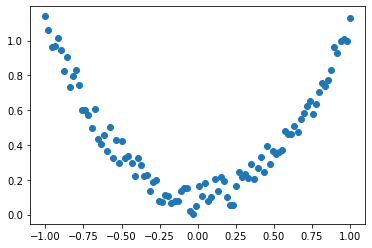

In [19]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [20]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    


In [21]:
net1 = Net(1, 10, 1)
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1),
)
print(net1, net2)
net = net2

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
) Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


In [22]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()

In [26]:
for t in range(100):
    prediction = net(x)
    
    loss = loss_func(prediction, y)
    loss.backward()
    optimizer.step()
    
    if t%5 == 0:
        print(loss)

tensor(0.0286, grad_fn=<MseLossBackward>)
tensor(0.0390, grad_fn=<MseLossBackward>)
tensor(0.0363, grad_fn=<MseLossBackward>)
tensor(0.0241, grad_fn=<MseLossBackward>)
tensor(0.0119, grad_fn=<MseLossBackward>)
tensor(0.0145, grad_fn=<MseLossBackward>)
tensor(0.0179, grad_fn=<MseLossBackward>)
tensor(0.0283, grad_fn=<MseLossBackward>)
tensor(0.0154, grad_fn=<MseLossBackward>)
tensor(0.0147, grad_fn=<MseLossBackward>)
tensor(0.0217, grad_fn=<MseLossBackward>)
tensor(0.0288, grad_fn=<MseLossBackward>)
tensor(0.0215, grad_fn=<MseLossBackward>)
tensor(0.0218, grad_fn=<MseLossBackward>)
tensor(0.0210, grad_fn=<MseLossBackward>)
tensor(0.0084, grad_fn=<MseLossBackward>)
tensor(0.0172, grad_fn=<MseLossBackward>)
tensor(0.0273, grad_fn=<MseLossBackward>)
tensor(0.0282, grad_fn=<MseLossBackward>)
tensor(0.0208, grad_fn=<MseLossBackward>)


In [27]:
torch.save(net, "net.pkl")

In [30]:
torch.load("net.pkl")(x)

array([[1.2169399 ],
       [1.1835179 ],
       [1.1500959 ],
       [1.1166741 ],
       [1.0832521 ],
       [1.0498302 ],
       [1.0164082 ],
       [0.9829862 ],
       [0.94956434],
       [0.9161424 ],
       [0.8827204 ],
       [0.8492985 ],
       [0.8158765 ],
       [0.78245455],
       [0.7490326 ],
       [0.7156107 ],
       [0.6821887 ],
       [0.64876676],
       [0.6105158 ],
       [0.570229  ],
       [0.52994215],
       [0.48965532],
       [0.44936854],
       [0.4090817 ],
       [0.3687948 ],
       [0.32850802],
       [0.28822118],
       [0.2479344 ],
       [0.20764753],
       [0.16736072],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153136  ],
       [0.153